# Explore here

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:


total_data = pd.read_csv("/workspaces/modelos-linear-regularizado/data/medical_insurance_cost.csv")

X = total_data.drop(columns=['charges']) # Features
Y = total_data['charges']# Target

total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
total_data.to_csv('../data/raw/total_data.csv', index=False)

In [6]:
print(total_data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
total_data.shape

(1338, 7)

In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
total_data["Y"]= Y

In [10]:
total_data['Y'].value_counts()

Y
1639.56310     2
2221.56445     1
19798.05455    1
13063.88300    1
13555.00490    1
              ..
1149.39590     1
37079.37200    1
4738.26820     1
2897.32350     1
4762.32900     1
Name: count, Length: 1337, dtype: int64

Limpiar duplicados

In [11]:
total_data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges,Y
0,19,female,27.900,0,yes,southwest,16884.92400,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500,2007.94500


Remover columnas innecesarias

Analisis variables univariantes

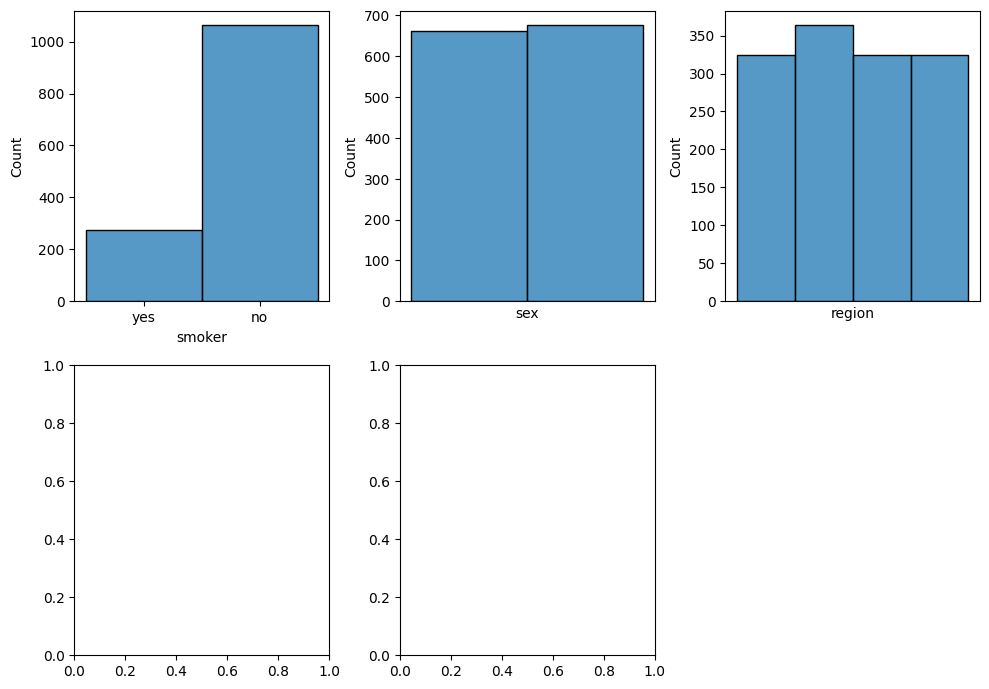

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Histograma
sns.histplot(ax=axis[0, 0], data=total_data, x="smoker")
sns.histplot(ax=axis[0, 1], data=total_data, x="sex").set_xticks([])
sns.histplot(ax=axis[0, 2], data=total_data, x="region").set_xticks([])

fig.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()


 Análisis de variables numericas

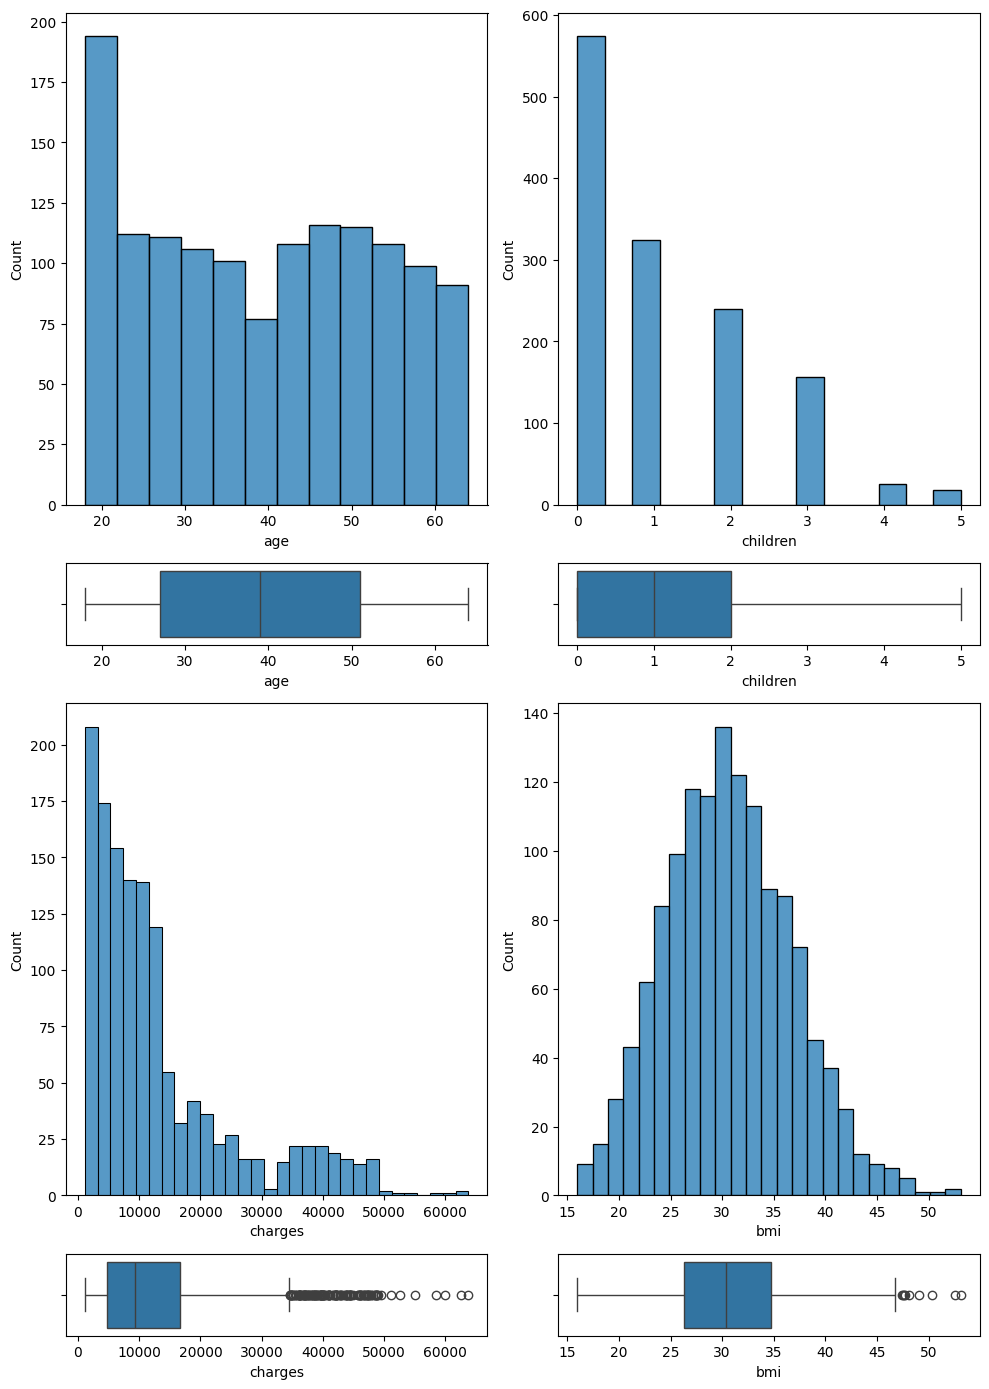

In [13]:
# Convertir las columnas de objeto a categorías
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "children")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "children")

sns.histplot(ax = axis[2, 0], data = total_data, x = "charges")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "charges")

sns.histplot(ax = axis[2, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "bmi")




plt.tight_layout()


plt.show()


Analisis de variables multivariantes

In [14]:
total_data['Y'] = pd.factorize(total_data['Y'])[0]

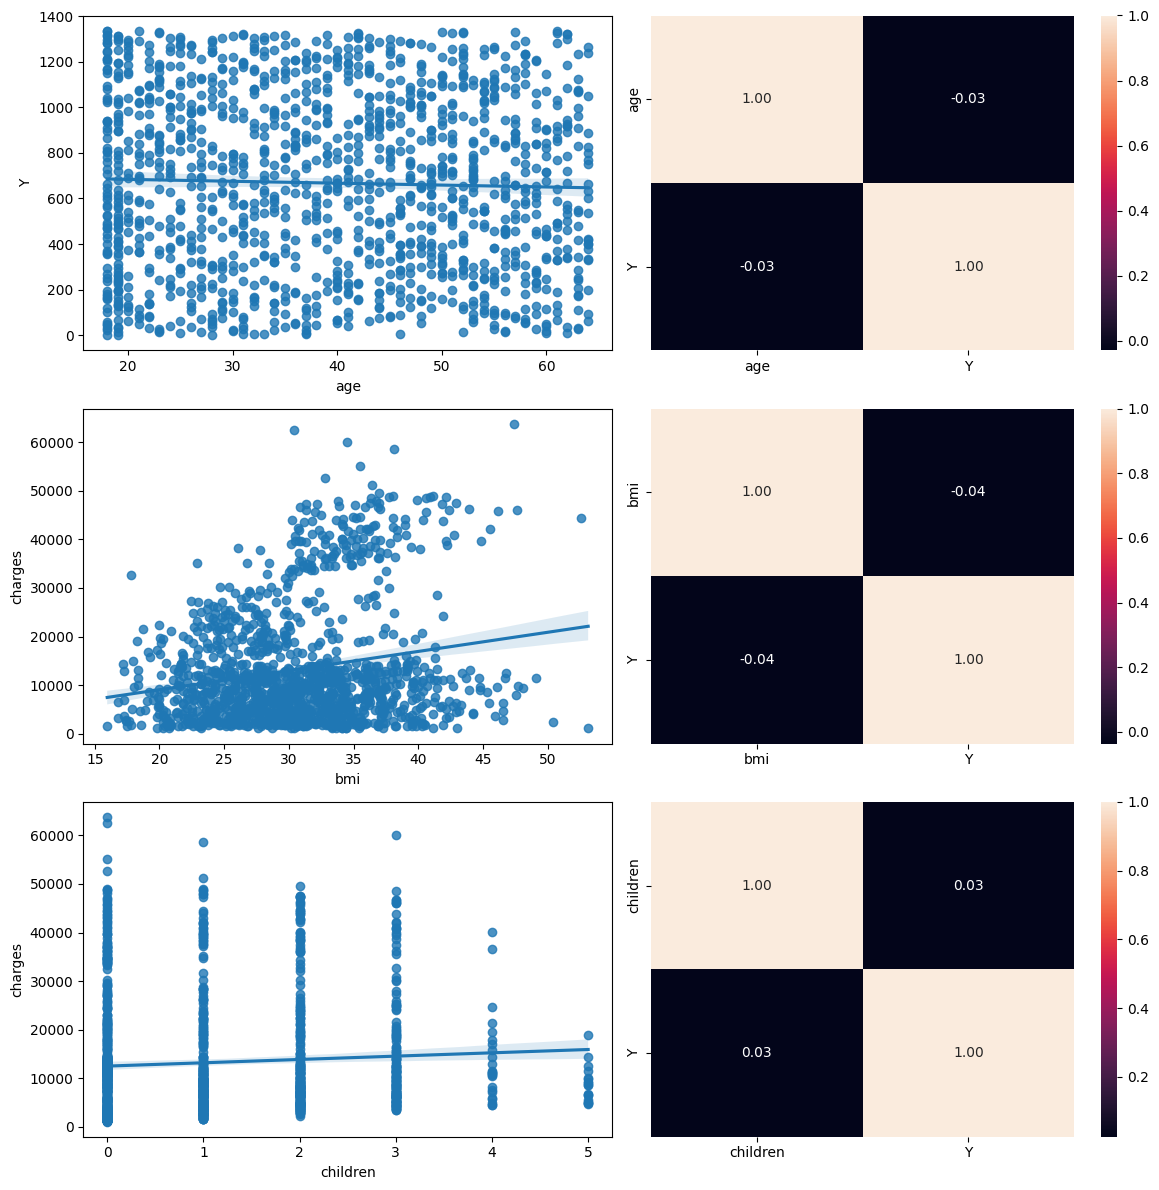

In [15]:
# Correlación entre las variables

fig, axis = plt.subplots(3, 2, figsize=(12, 12))

sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="Y")
sns.heatmap(total_data[["age", "Y"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1]).set(ylabel=None)

sns.regplot(ax=axis[1, 0], data=total_data, x="bmi", y="charges")
sns.heatmap(total_data[["bmi", "Y"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(ax=axis[2, 0], data=total_data, x="children", y="charges")
sns.heatmap(total_data[["children", "Y"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1]).set(ylabel=None)

plt.tight_layout()
plt.show()


analisis categorico

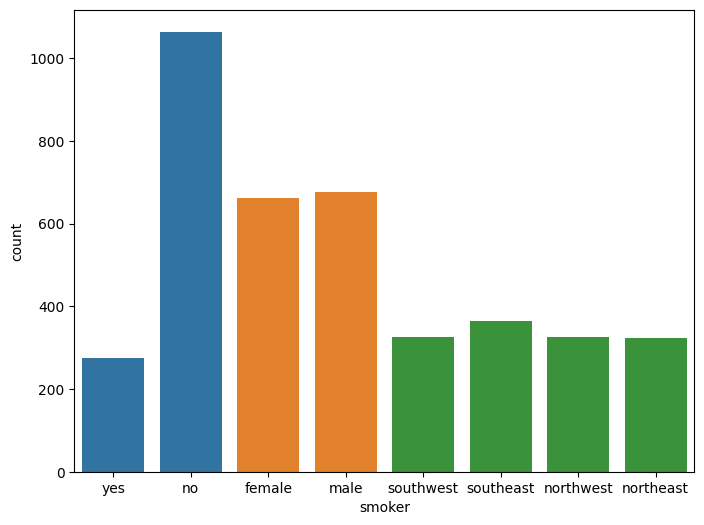

In [16]:

fig, axis = plt.subplots(figsize = (8, 6))

sns.countplot(data = total_data, x = "smoker")
sns.countplot(data = total_data, x = "sex")
sns.countplot(data = total_data, x = "region")

# Show the plot
plt.show()





Analisis de variables numericas categoricas

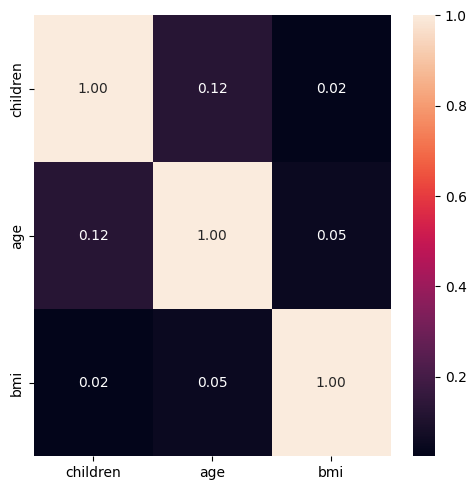

In [17]:

total_data["age"] = pd.factorize(total_data["age"])[0]
total_data["children"] = pd.factorize(total_data["children"])[0]
total_data["bmi"] = pd.factorize(total_data["bmi"])[0]

fig, axes = plt.subplots(figsize=(5, 5))

sns.heatmap(total_data[["children","age","bmi"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()


plt.show()


In [18]:
round(total_data.describe(),2)

,age,bmi,children,charges,Y
count,1338.00,1338.00,1338.00,1338.00,1338.00
mean,21.74,221.72,1.16,13270.42,667.65
std,14.30,149.17,1.29,12110.01,386.18
min,0.00,0.00,0.00,1121.87,0.00
25%,9.00,95.25,0.00,4740.29,333.25
50%,22.00,203.00,1.00,9382.03,667.50
75%,34.00,333.00,2.00,16639.91,1001.75
max,46.00,547.00,5.00,63770.43,1336.00


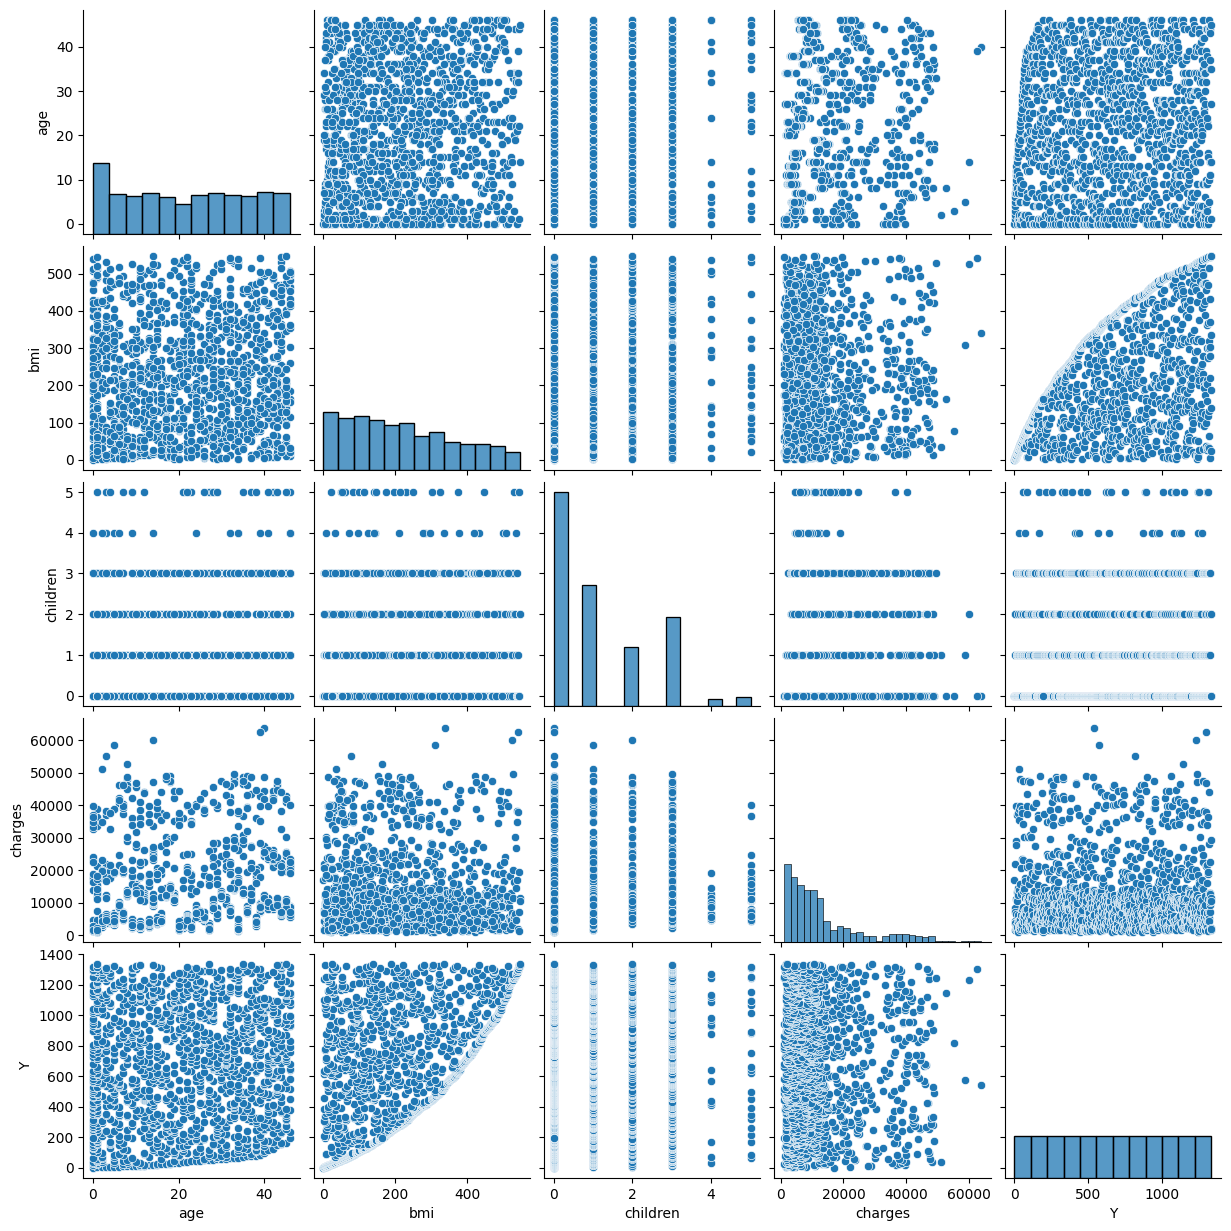

In [19]:
sns.pairplot(data = total_data)

In [20]:
# One-Hot Encoding para variables categóricas
total_data = pd.get_dummies(total_data, columns=["sex", "smoker", "region"], drop_first=True)


In [21]:
#Definir las variables X
X = total_data.drop("Y", axis = 1)

In [22]:
total_data["Y"] = pd.factorize(total_data["Y"])[0]

In [23]:
Y = total_data["Y"]

analisis de outlier

In [24]:
total_data.describe()

,age,bmi,children,charges,Y
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,21.736173,221.718236,1.162182,13270.422265,667.646487
std,14.298189,149.169320,1.287941,12110.011237,386.175105
min,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,9.000000,95.250000,0.000000,4740.287150,333.250000
50%,22.000000,203.000000,1.000000,9382.033000,667.500000
75%,34.000000,333.000000,2.000000,16639.912515,1001.750000
max,46.000000,547.000000,5.000000,63770.428010,1336.000000


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   int64  
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(1), int64(3)
memory usage: 48.5 KB


División de los datos para entrenamiento

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")


Tamaño de entrenamiento: (1070, 9), Prueba: (268, 9)


In [28]:
X_train.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,6,91,3,9193.83850,False,False,True,False,False
1285,42,200,0,8534.67180,False,False,False,False,False
1142,14,443,0,27117.99378,False,False,False,True,False
969,46,419,4,8596.82780,False,False,False,True,False
486,40,321,2,12475.35130,False,False,True,False,False


In [29]:
X_test.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,39,124,3,9095.06825,False,False,False,False,False
887,26,190,0,5272.17580,False,False,True,False,False
890,33,78,0,29330.98315,False,True,True,False,False
1293,6,474,2,9301.89355,True,False,True,False,False
259,0,23,0,33750.29180,True,True,True,False,False


In [30]:
Y_train.value_counts()

Y
1125    1
560     1
1284    1
1141    1
968     1
       ..
147     1
10      1
1206    1
316     1
931     1
Name: count, Length: 1070, dtype: int64

In [31]:
Y_test.value_counts()

Y
845     1
763     1
886     1
889     1
1292    1
       ..
649     1
892     1
900     1
265     1
76      1
Name: count, Length: 268, dtype: int64

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Instanciar el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, Y_train)

# Mostrar coeficientes del modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


Coeficientes: [ 1.07821828e+00  1.20256006e+00  8.21851609e+00  1.93818830e-04
 -3.38423974e+00  3.07387875e+01  1.86746718e+01 -4.22230045e+01
 -4.92859208e+01]
Intercepto: 378.0228633930261


In [33]:
Y_pred = model.predict(X_test)


In [34]:
# Calcular métricas
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"MAE: {round(mae, 2)}")#Promedio de los errores absolutos entre los valores reales y predichos.
print(f"MSE: {round(mse, 2)}")#promedio de los errores cuadráticos, penalizando más los grandes errores.
print(f"R^2: {round(r2, 4)}") #Explica qué tan bien el modelo ajusta los datos. Un valor cercano a 1 indica buen desempeño.


MAE: 296.92
MSE: 121699.08
R^2: 0.1885


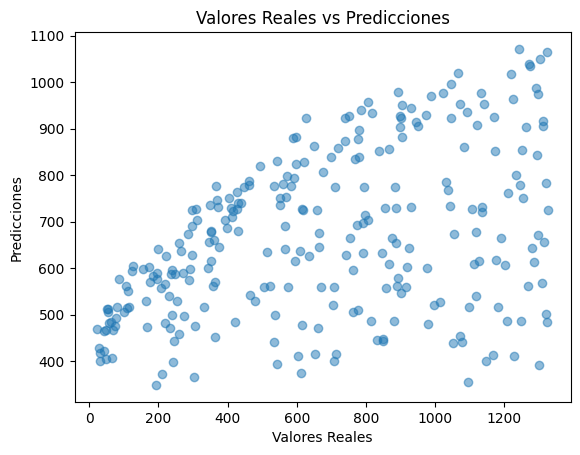

In [35]:
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.show()


In [36]:
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
print(coef_df.sort_values(by="Coeficiente", ascending=False))


           Variable  Coeficiente
5        smoker_yes    30.738787
6  region_northwest    18.674672
2          children     8.218516
1               bmi     1.202560
0               age     1.078218
3           charges     0.000194
4          sex_male    -3.384240
7  region_southeast   -42.223004
8  region_southwest   -49.285921


Entrenamiento y Evaluación del Modelo Lasso (L1)

In [37]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

#instancia de modelo de regresión lineal

lasso_model = Lasso(alpha=0.1)

#entrenar el modelo
lasso_model.fit(X_train, Y_train)

#predicciones
Y_pred_lasso = lasso_model.predict(X_test)

#Evaluacion
mae_lasso = mean_absolute_error(Y_test, Y_pred_lasso) 
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

print(f"Lasso - MAE: {round(mae_lasso, 2)}, MSE: {round(mse_lasso, 2)}, R^2: {round(r2_lasso, 4)}")



Lasso - MAE: 296.91, MSE: 121678.0, R^2: 0.1886


interpretar los coeficientes:

In [38]:
print("Coeficientes Lasso:", lasso_model.coef_)

Coeficientes Lasso: [ 1.07477771e+00  1.20232253e+00  8.14266018e+00  2.35918474e-04
 -2.92985650e+00  2.90954628e+01  1.86417113e+01 -4.14472707e+01
 -4.84803751e+01]


Entrenamiento y Evaluación del Modelo Ridge (L2)

In [39]:
# Instanciar el modelo de Ridge con un valor de alpha
ridge_model = Ridge(alpha=0.1)  # Ajusta el parámetro alpha según sea necesario

# Entrenar el modelo
ridge_model.fit(X_train, Y_train)

# Predicciones
Y_pred_ridge = ridge_model.predict(X_test)

# Evaluación
mae_ridge = mean_absolute_error(Y_test, Y_pred_ridge)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print(f"Ridge - MAE: {round(mae_ridge, 2)}, MSE: {round(mse_ridge, 2)}, R^2: {round(r2_ridge, 4)}")


Ridge - MAE: 296.92, MSE: 121698.64, R^2: 0.1885


interpretar los coeficientes:

In [40]:
print("Coeficientes Ridge:", ridge_model.coef_)

Coeficientes Ridge: [ 1.07812185e+00  1.20254872e+00  8.21754843e+00  1.94989147e-04
 -3.38150156e+00  3.06936964e+01  1.86940453e+01 -4.21809873e+01
 -4.92400807e+01]


Comparación de Modelos

In [41]:
print("Comparación de Modelos:")
print(f"Regresión Lineal - R^2: {round(r2, 4)}")
print(f"Lasso - R^2: {round(r2_lasso, 4)}")
print(f"Ridge - R^2: {round(r2_ridge, 4)}")

Comparación de Modelos:
Regresión Lineal - R^2: 0.1885
Lasso - R^2: 0.1886
Ridge - R^2: 0.1885


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.191e+07, tolerance: 1.592e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

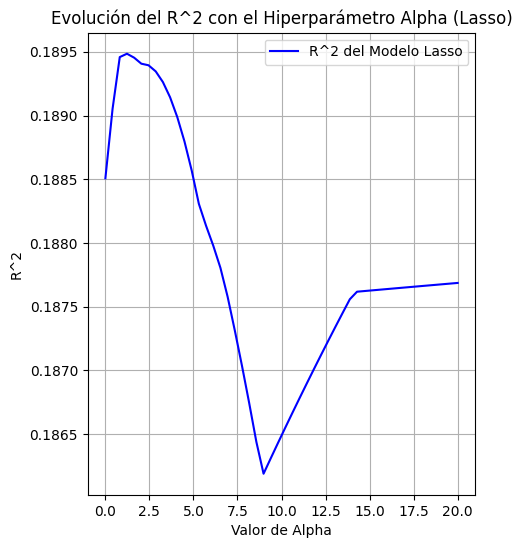

In [42]:
# Rango de valores de alpha
alphas = np.linspace(0, 20)  # 100 valores de 0.0 a 20.0
r2_scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)  # max_iter alto para asegurar convergencia
    lasso_model.fit(X_train, Y_train)
    Y_pred = lasso_model.predict(X_test)
    r2_scores.append(r2_score(Y_test, Y_pred))


plt.figure(figsize=(5, 6))
plt.plot(alphas, r2_scores, label="R^2 del Modelo Lasso", color="blue")
plt.xlabel("Valor de Alpha")
plt.ylabel("R^2")
plt.title("Evolución del R^2 con el Hiperparámetro Alpha (Lasso)")
plt.legend()
plt.grid(True)
plt.show()
